In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from colorthief import ColorThief
import requests
from tqdm import tqdm
import time

In [2]:
df = pd.read_csv('data/csv/data_20210109_213012.csv')

## Choosing "quality" for detecting dominant colour

... inherenting the essence of GridSearch.

In [37]:
testing_values = range(10, 201, 10)

In [38]:
best_dominant_colors = []

for image_url in tqdm(df.iloc[:100].thumbnail, desc='Detecting thumbnail colour...'):
    with open('images/pic.jpg', 'wb') as handler:
        response = requests.get(image_url, stream=True).content
        handler.write(response)
    best_dominant_colors += [ColorThief('images/pic.jpg').get_color(quality=1)]

Detecting thumbnail colour...: 100%|█████████████████████████████████████████████████| 100/100 [05:51<00:00,  3.51s/it]


In [39]:
differences = pd.Series(dtype='float64')
times = pd.Series(dtype='float64')

for value in testing_values:
    print(f'Current value: {value}')
    dominant_colors = []
    start_time = time.time()
    
    for image_url in tqdm(df.iloc[:100].thumbnail):
        with open('images/pic.jpg', 'wb') as handler:
            response = requests.get(image_url, stream=True).content
            handler.write(response)
        dominant_colors += [ColorThief('images/pic.jpg').get_color(quality=value)]
        
    difference = []
    
    for t1, t2 in zip(best_dominant_colors, dominant_colors):
        difference += [sum(map(lambda i,j: np.abs(i-j), t1, t2))]
        
    differences = differences.append(pd.Series(sum(difference), index=[value]))
    times = times.append(pd.Series(time.time() - start_time, index=[value]))

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Current value: 10


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Current value: 20


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Current value: 30


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Current value: 40


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Current value: 50


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Current value: 60


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Current value: 70


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Current value: 80


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Current value: 90


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Current value: 100


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Current value: 110


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Current value: 120


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Current value: 130


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Current value: 140


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Current value: 150


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Current value: 160


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Current value: 170


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Current value: 180


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Current value: 190


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Current value: 200


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:23<00:00,  4.27it/s]


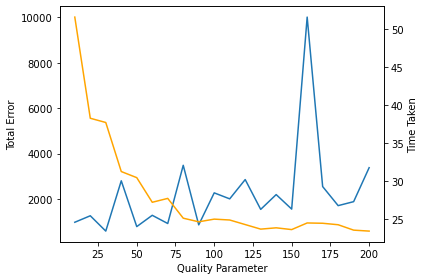

In [44]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(differences)
ax1.set_xlabel('Quality Parameter')
ax1.set_ylabel('Total Error')

ax2.plot(times, color='orange')
ax2.set_ylabel('Time Taken')

fig.tight_layout()
plt.show()

Around 125 seems to be the sweet spot where there are not much compensation to accuracy but with a relatively low operation time!

The spike of 160 should be due to one particular error.